# Baseball Case Study


# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
## Input features: 
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
## Output: 
Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


### Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings("ignore")

In [5]:
# Import DataSet: 

df = pd.read_csv(r"E:\datatrained\baseball_data.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [9]:
df.shape

(30, 17)

In [7]:
#Observe the given DataSet:

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [11]:
# checking stats of our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


###  Data Visualization


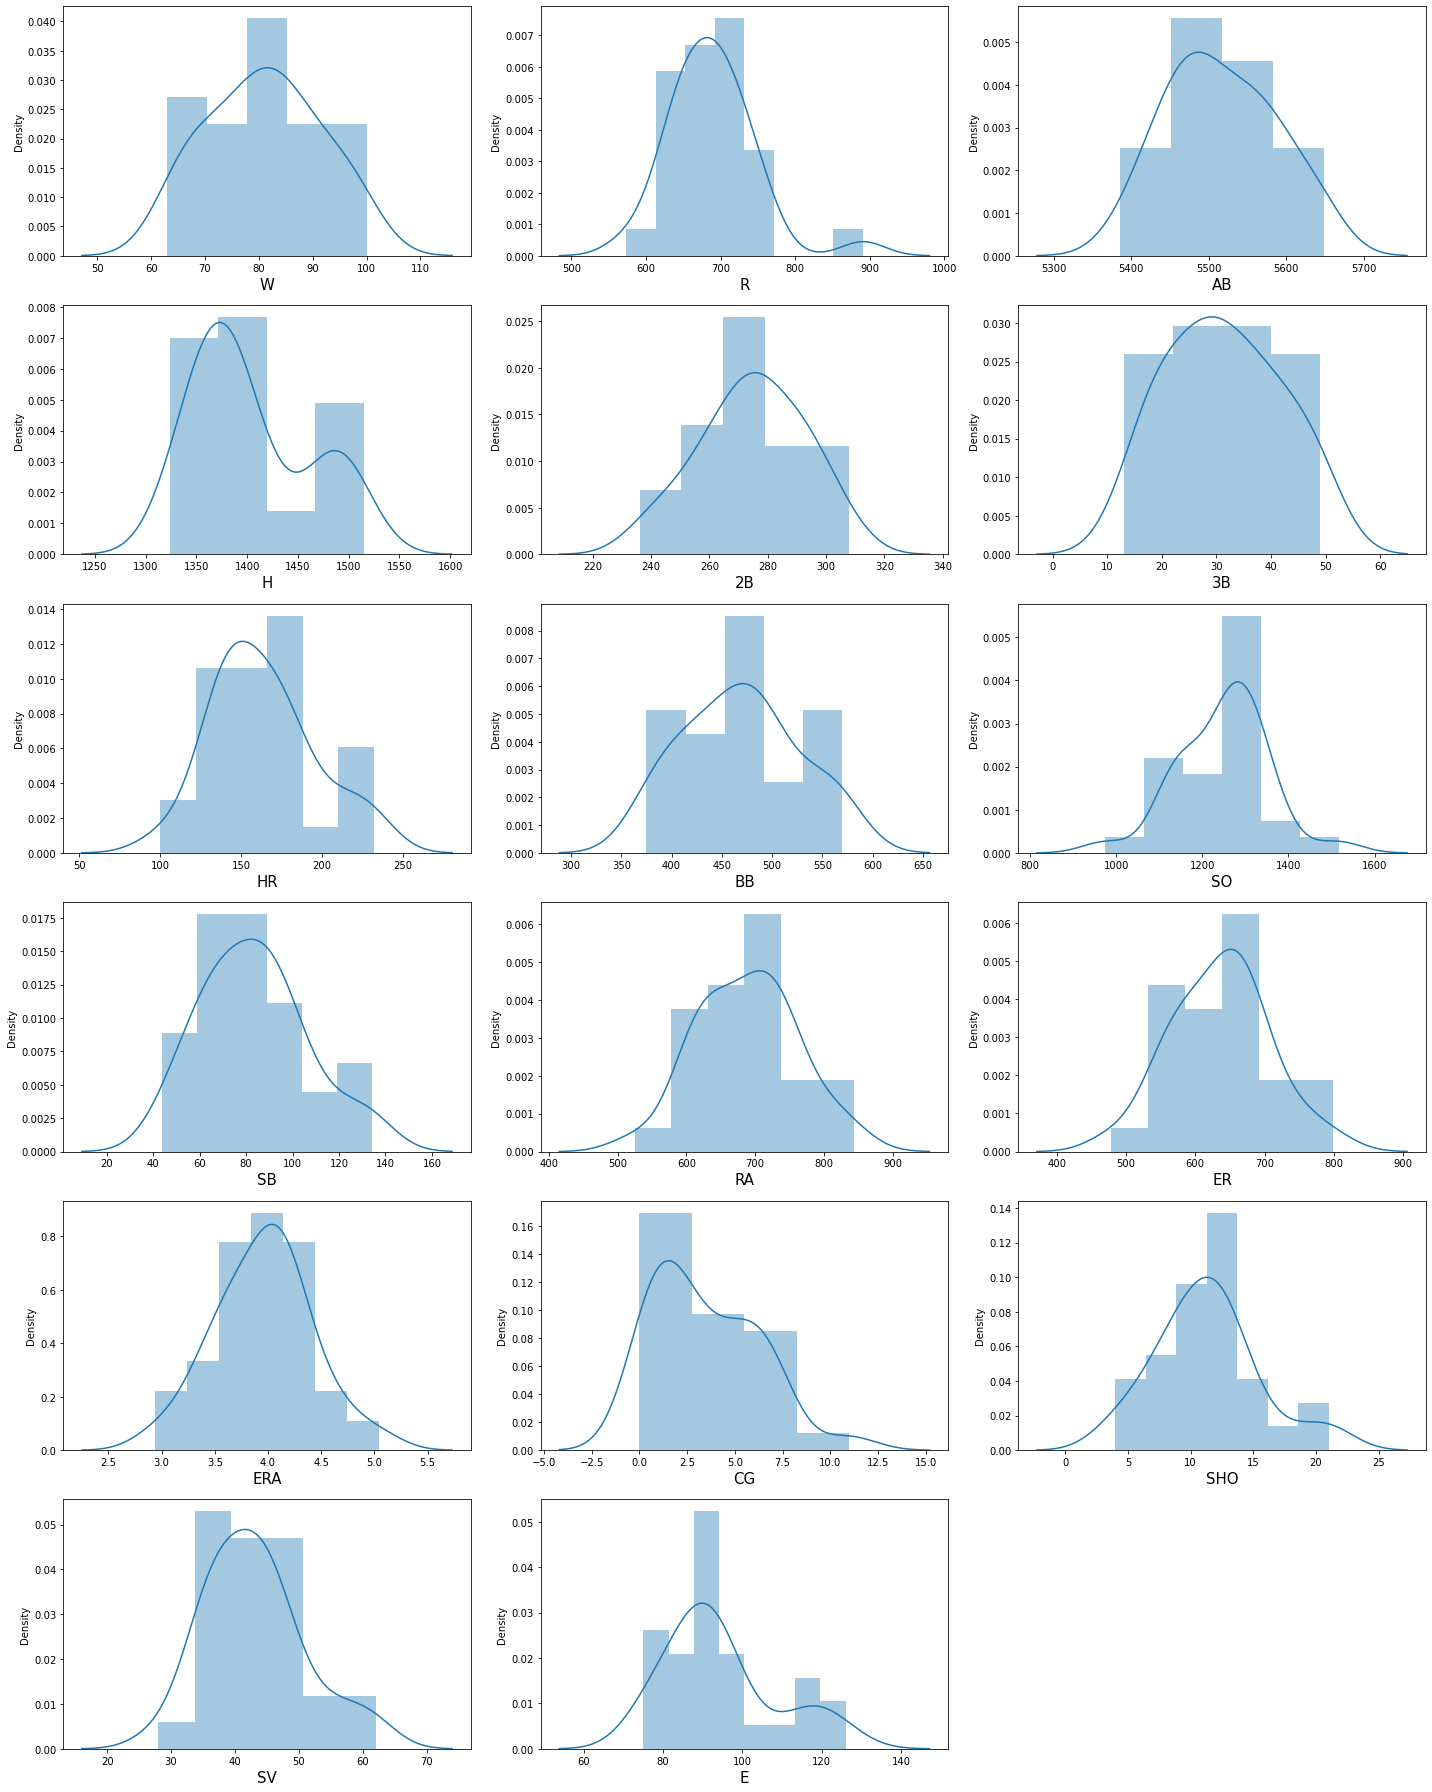

In [12]:
# Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=18 : 
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

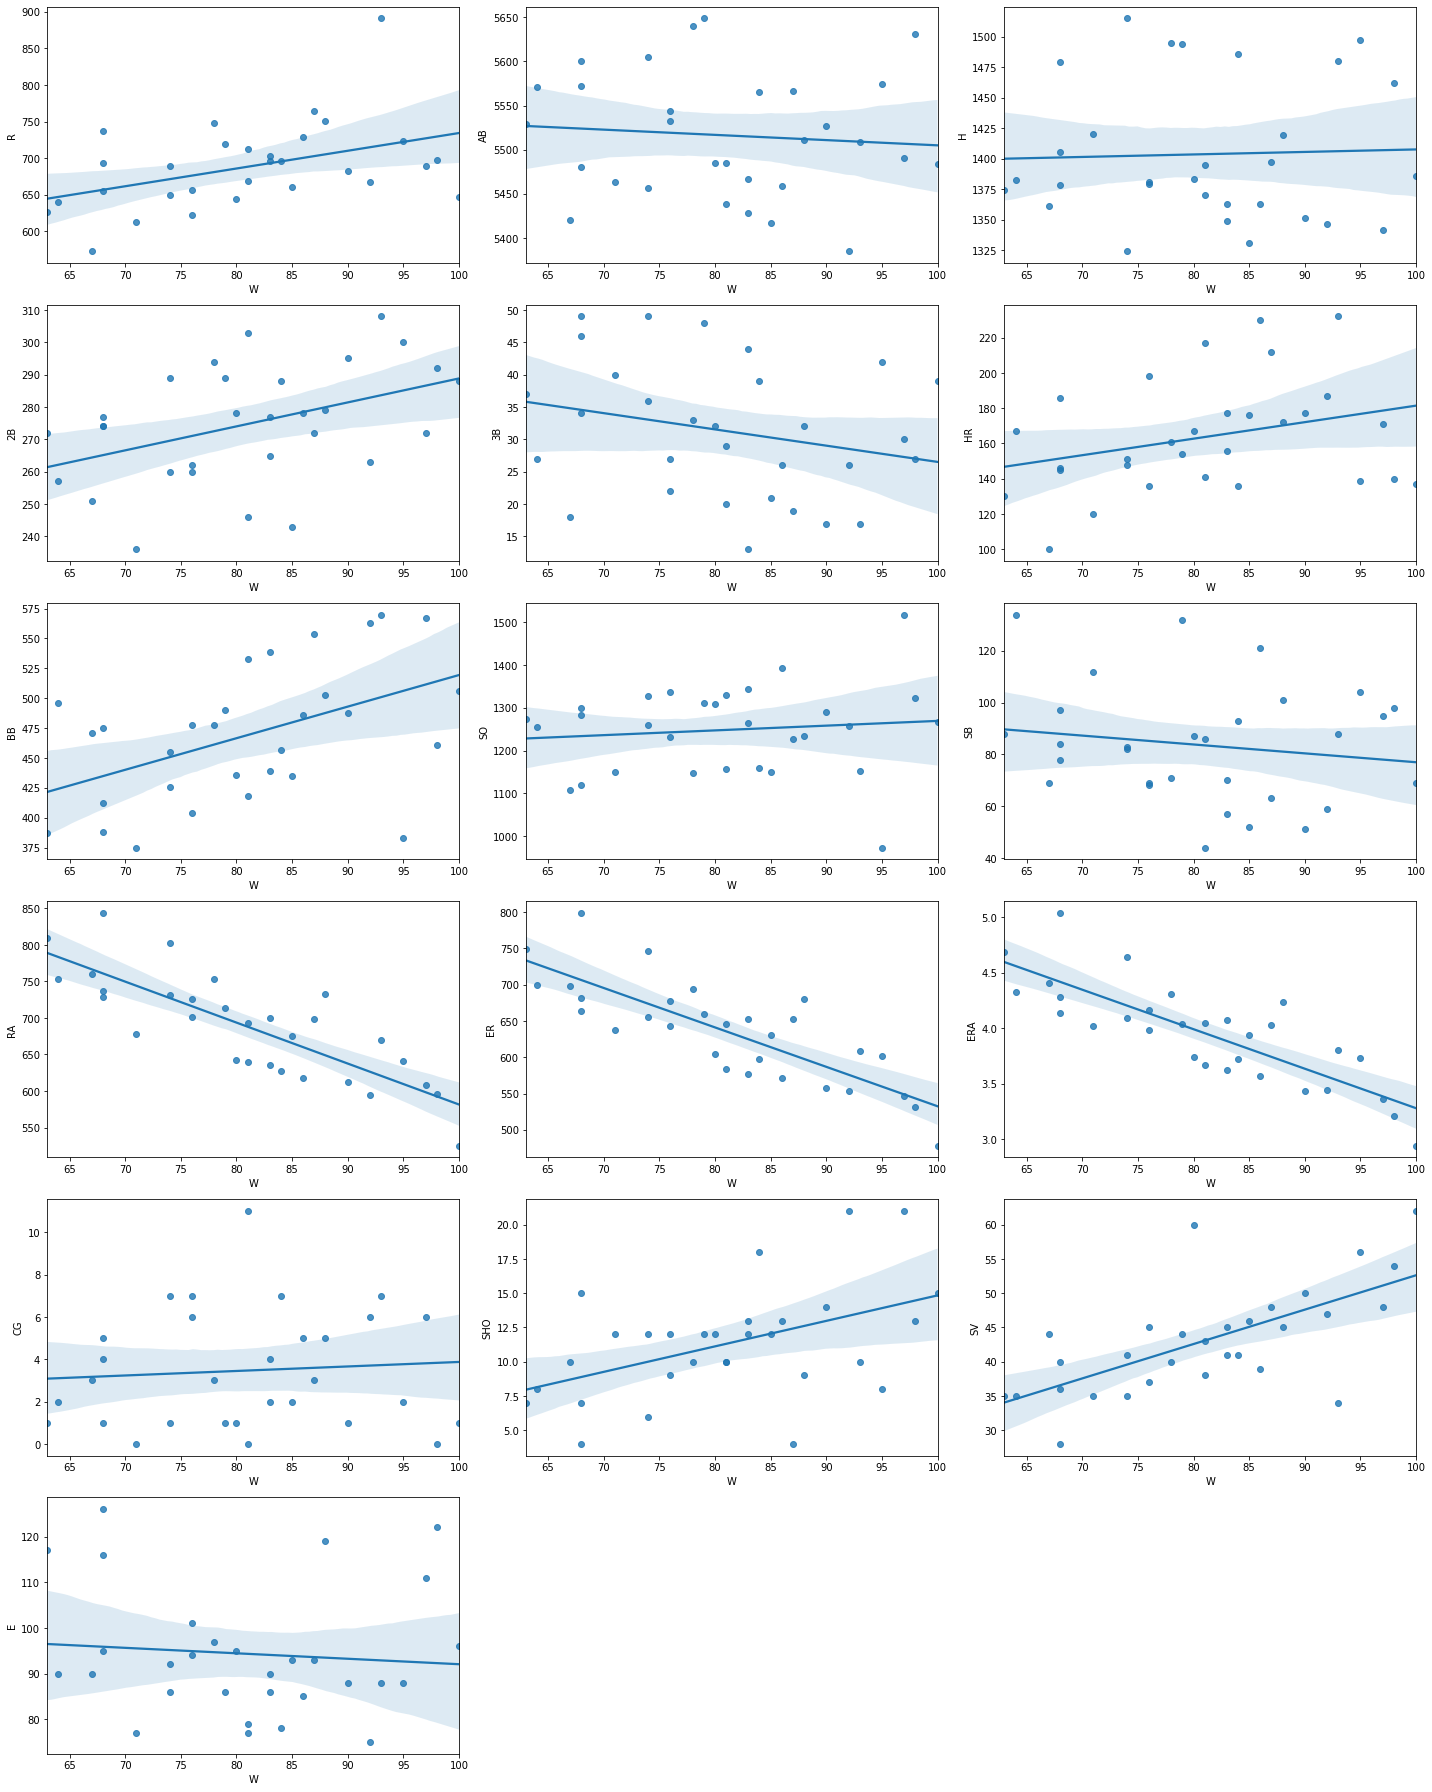

In [15]:
# Comparing Each features with target

X = df.drop(columns=['W'])
Y = df['W']

plt.figure(figsize=(20,25))
plotnumber=1

for column in X:
    if plotnumber<=18 : 
        ax=plt.subplot(6,3,plotnumber)
        sns.regplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

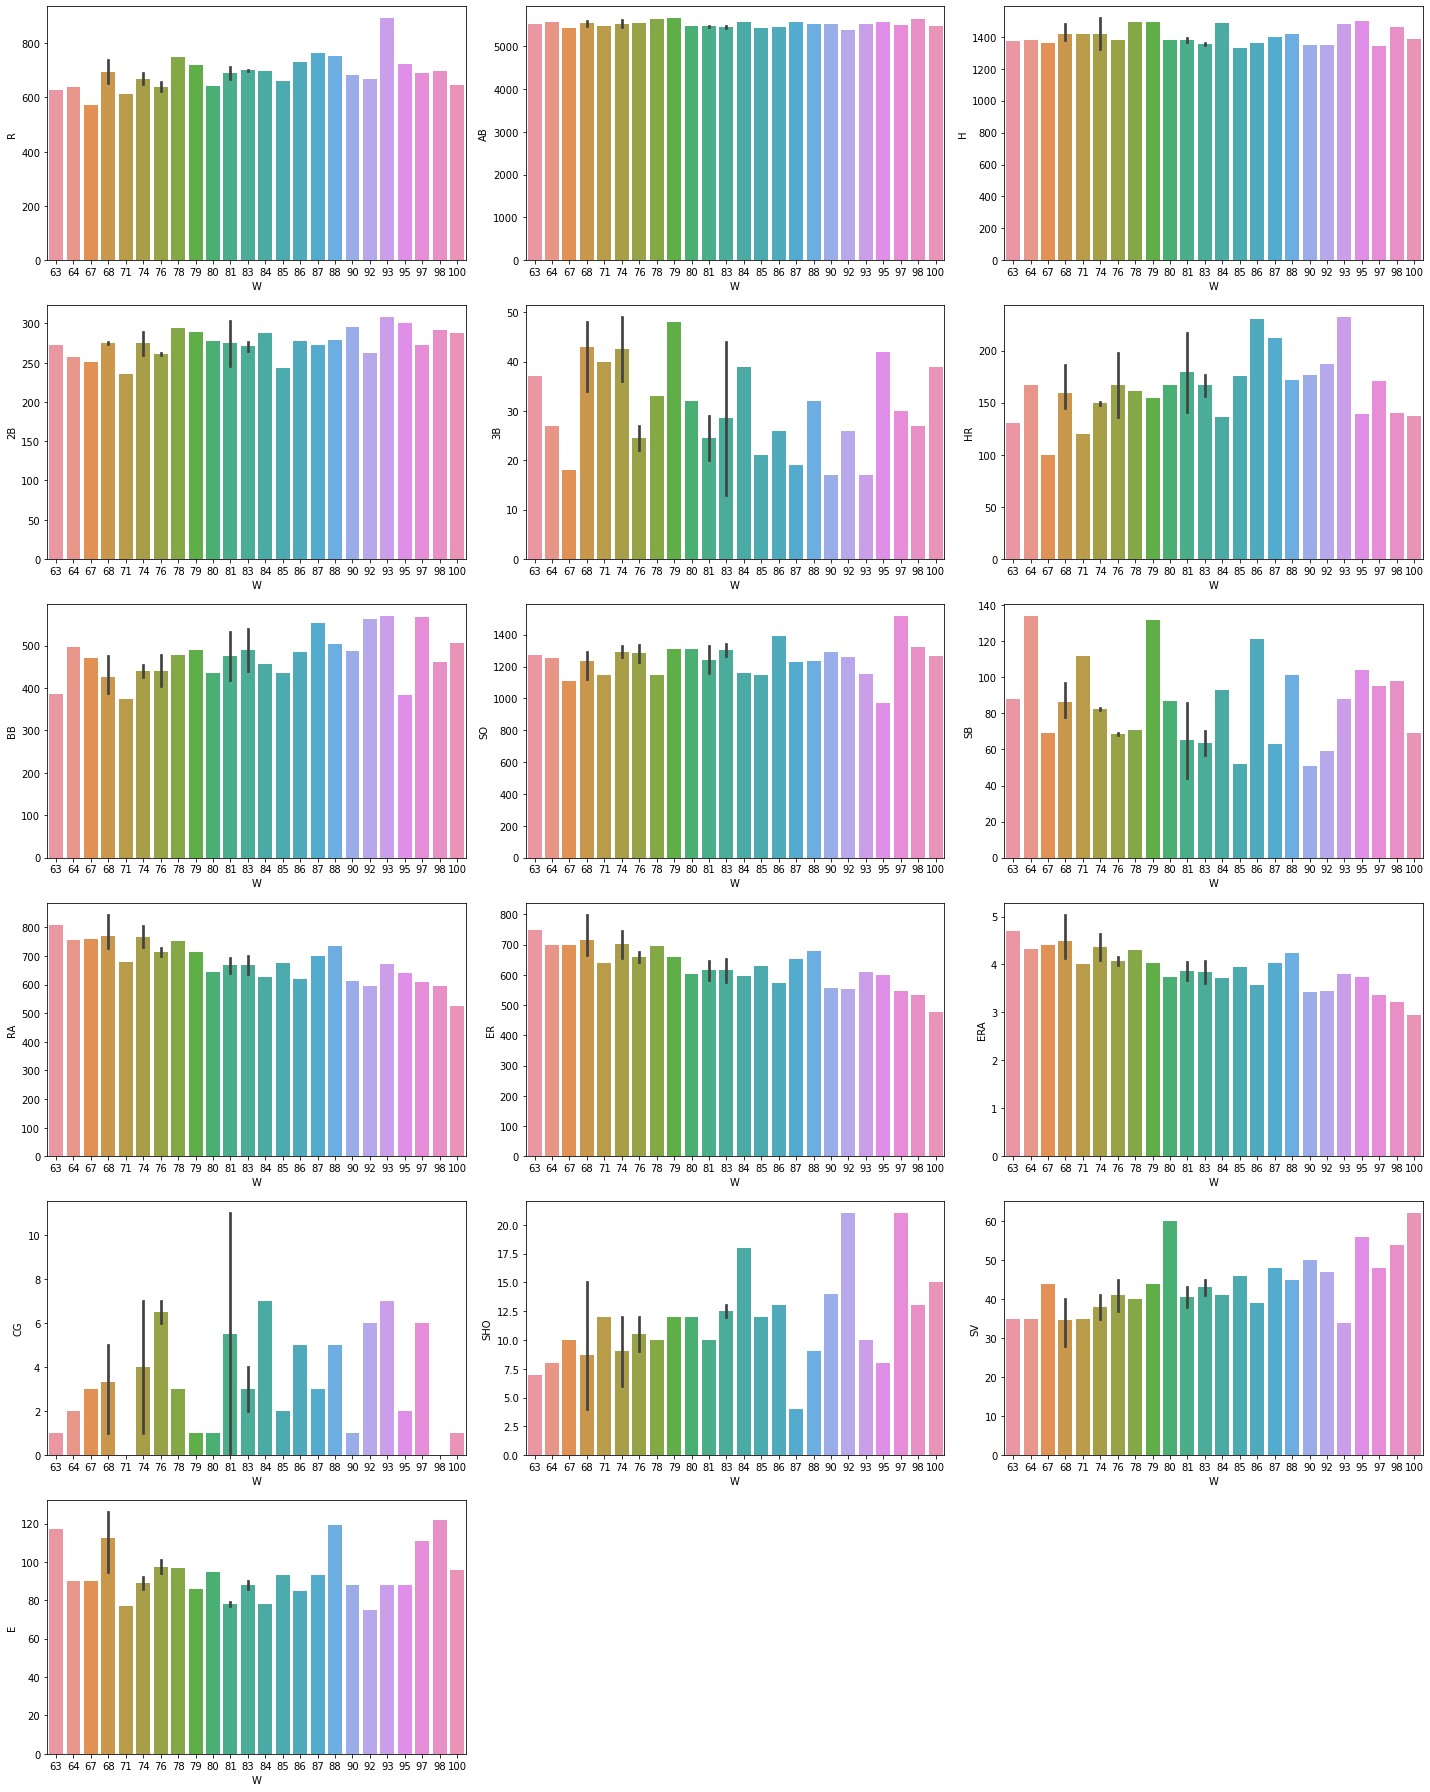

In [16]:
# Distribution of columns :


plt.figure(figsize=(20,25))
plotnumber=1

for column in X:
    if plotnumber<=18 : 
        ax=plt.subplot(6,3,plotnumber)
        sns.barplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

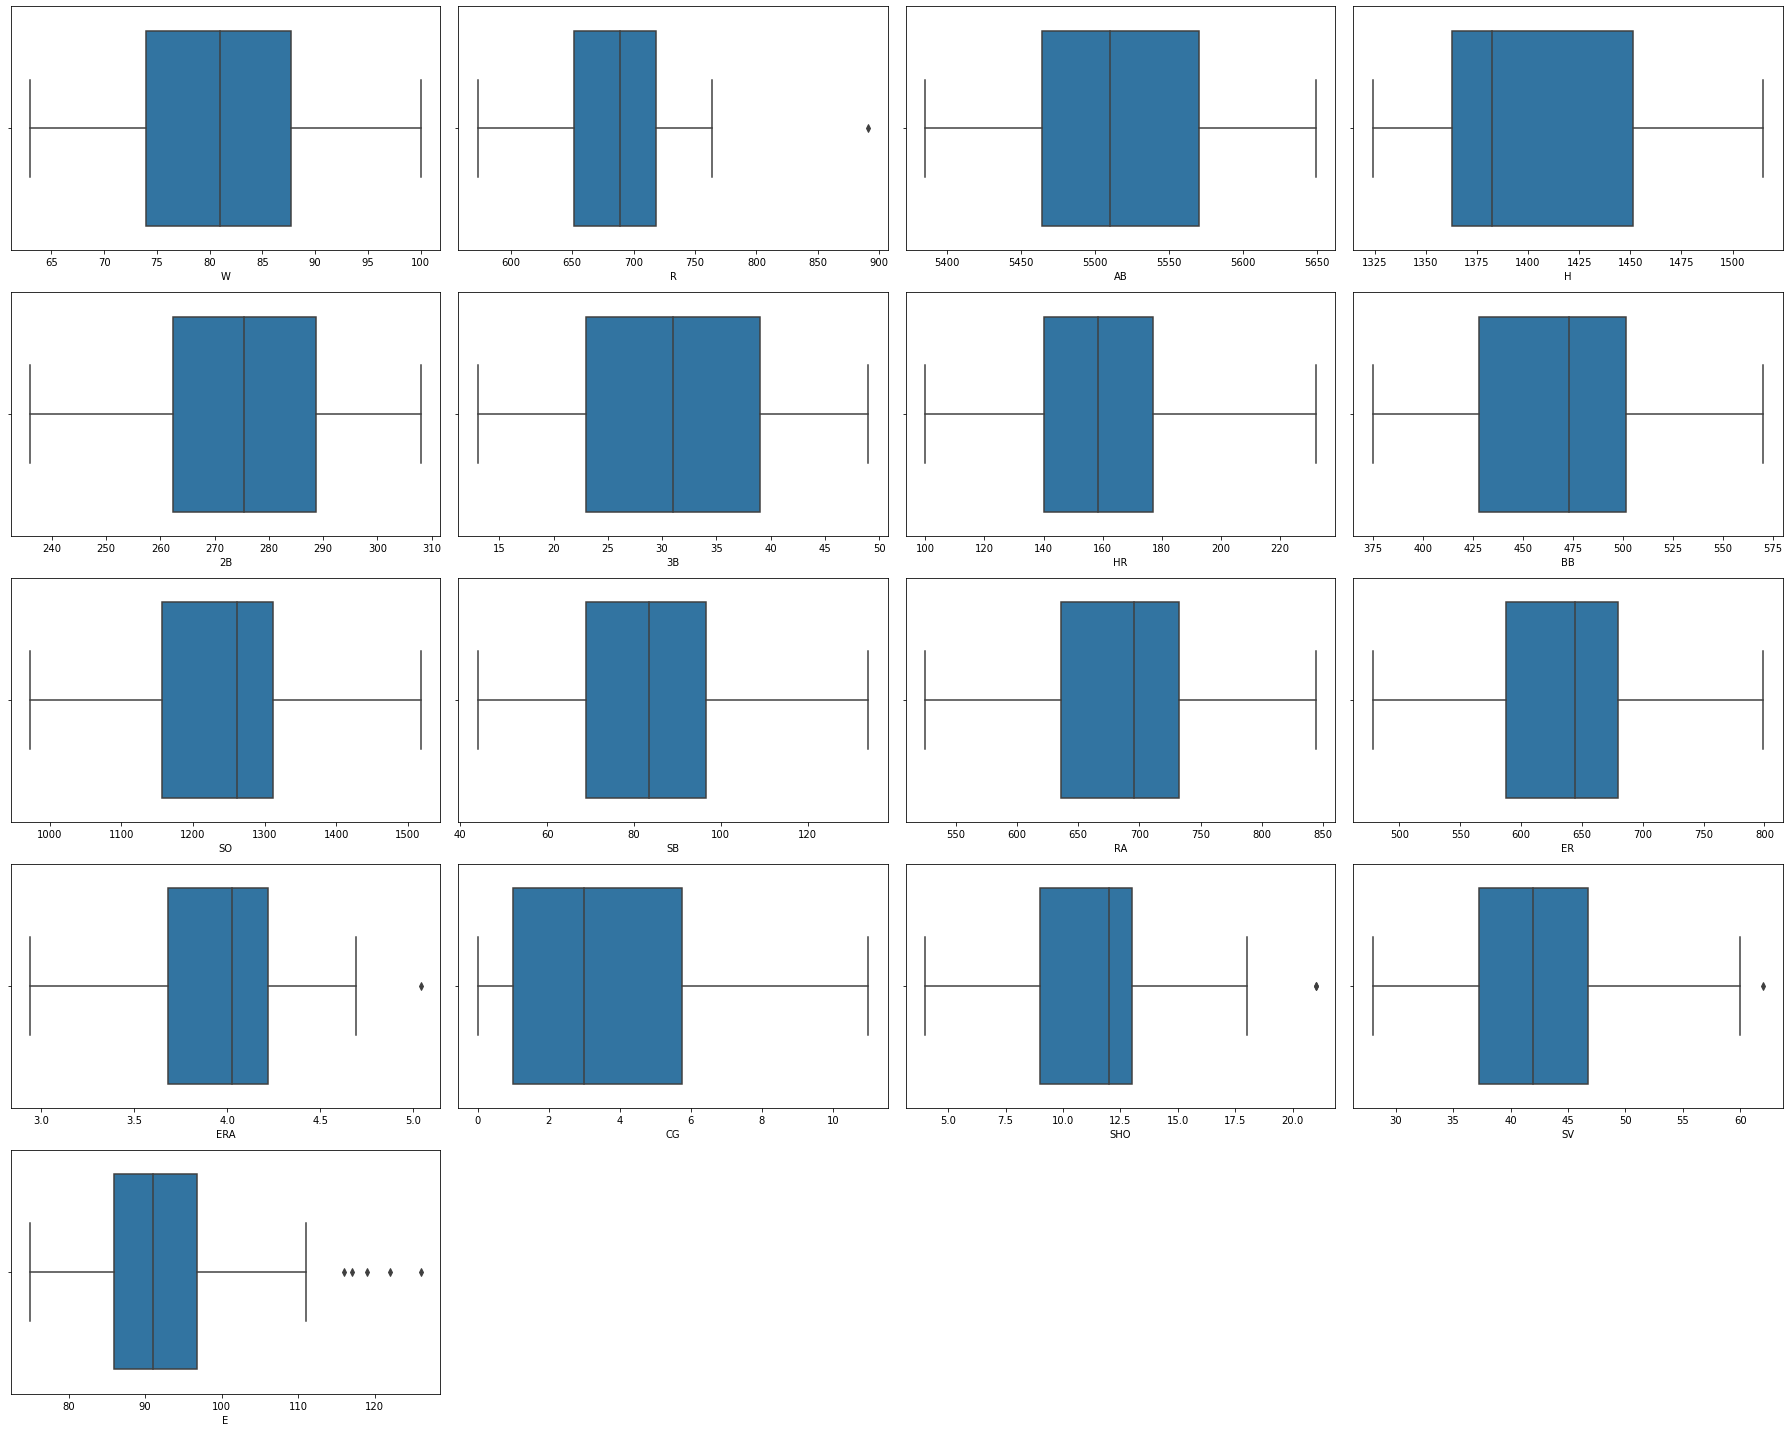

In [17]:
# outlier presence in data or not using box plot

plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df[column])
        
    plotnumber+=1
plt.tight_layout()

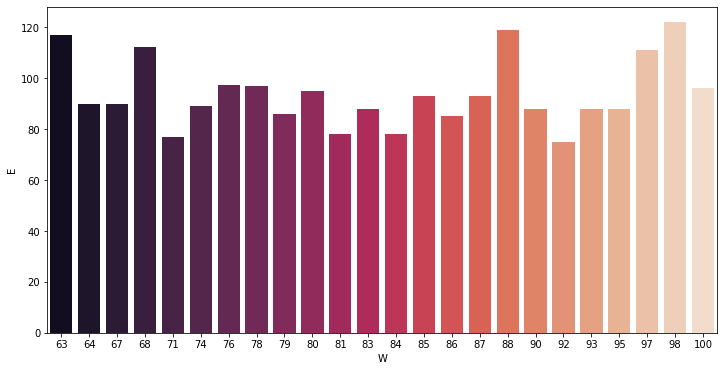

In [19]:
# Graph shows us the "wins" with "Errors".


plt.figure(figsize=(12, 6))
ax = sns.barplot(x="W", y="E", data=df, palette="rocket", ci=None)

<AxesSubplot:label='cba0cf52-d066-439c-bd8d-13e36810dc25', xlabel='ER', ylabel='ERA'>

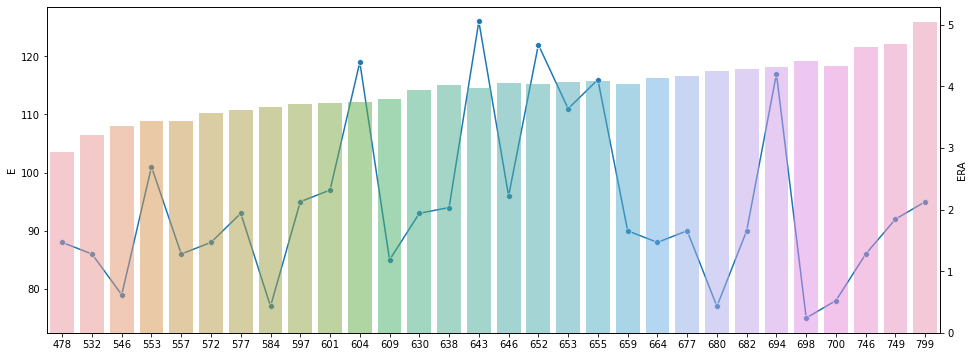

In [20]:
#  Mixture of both bar graph and an error in the form of a line graph

fig, ax1 = plt.subplots(figsize=(16,6))

sns.lineplot(data = df['E'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = df, x='ER', y='ERA', alpha=0.5, ax=ax2, ci=None)

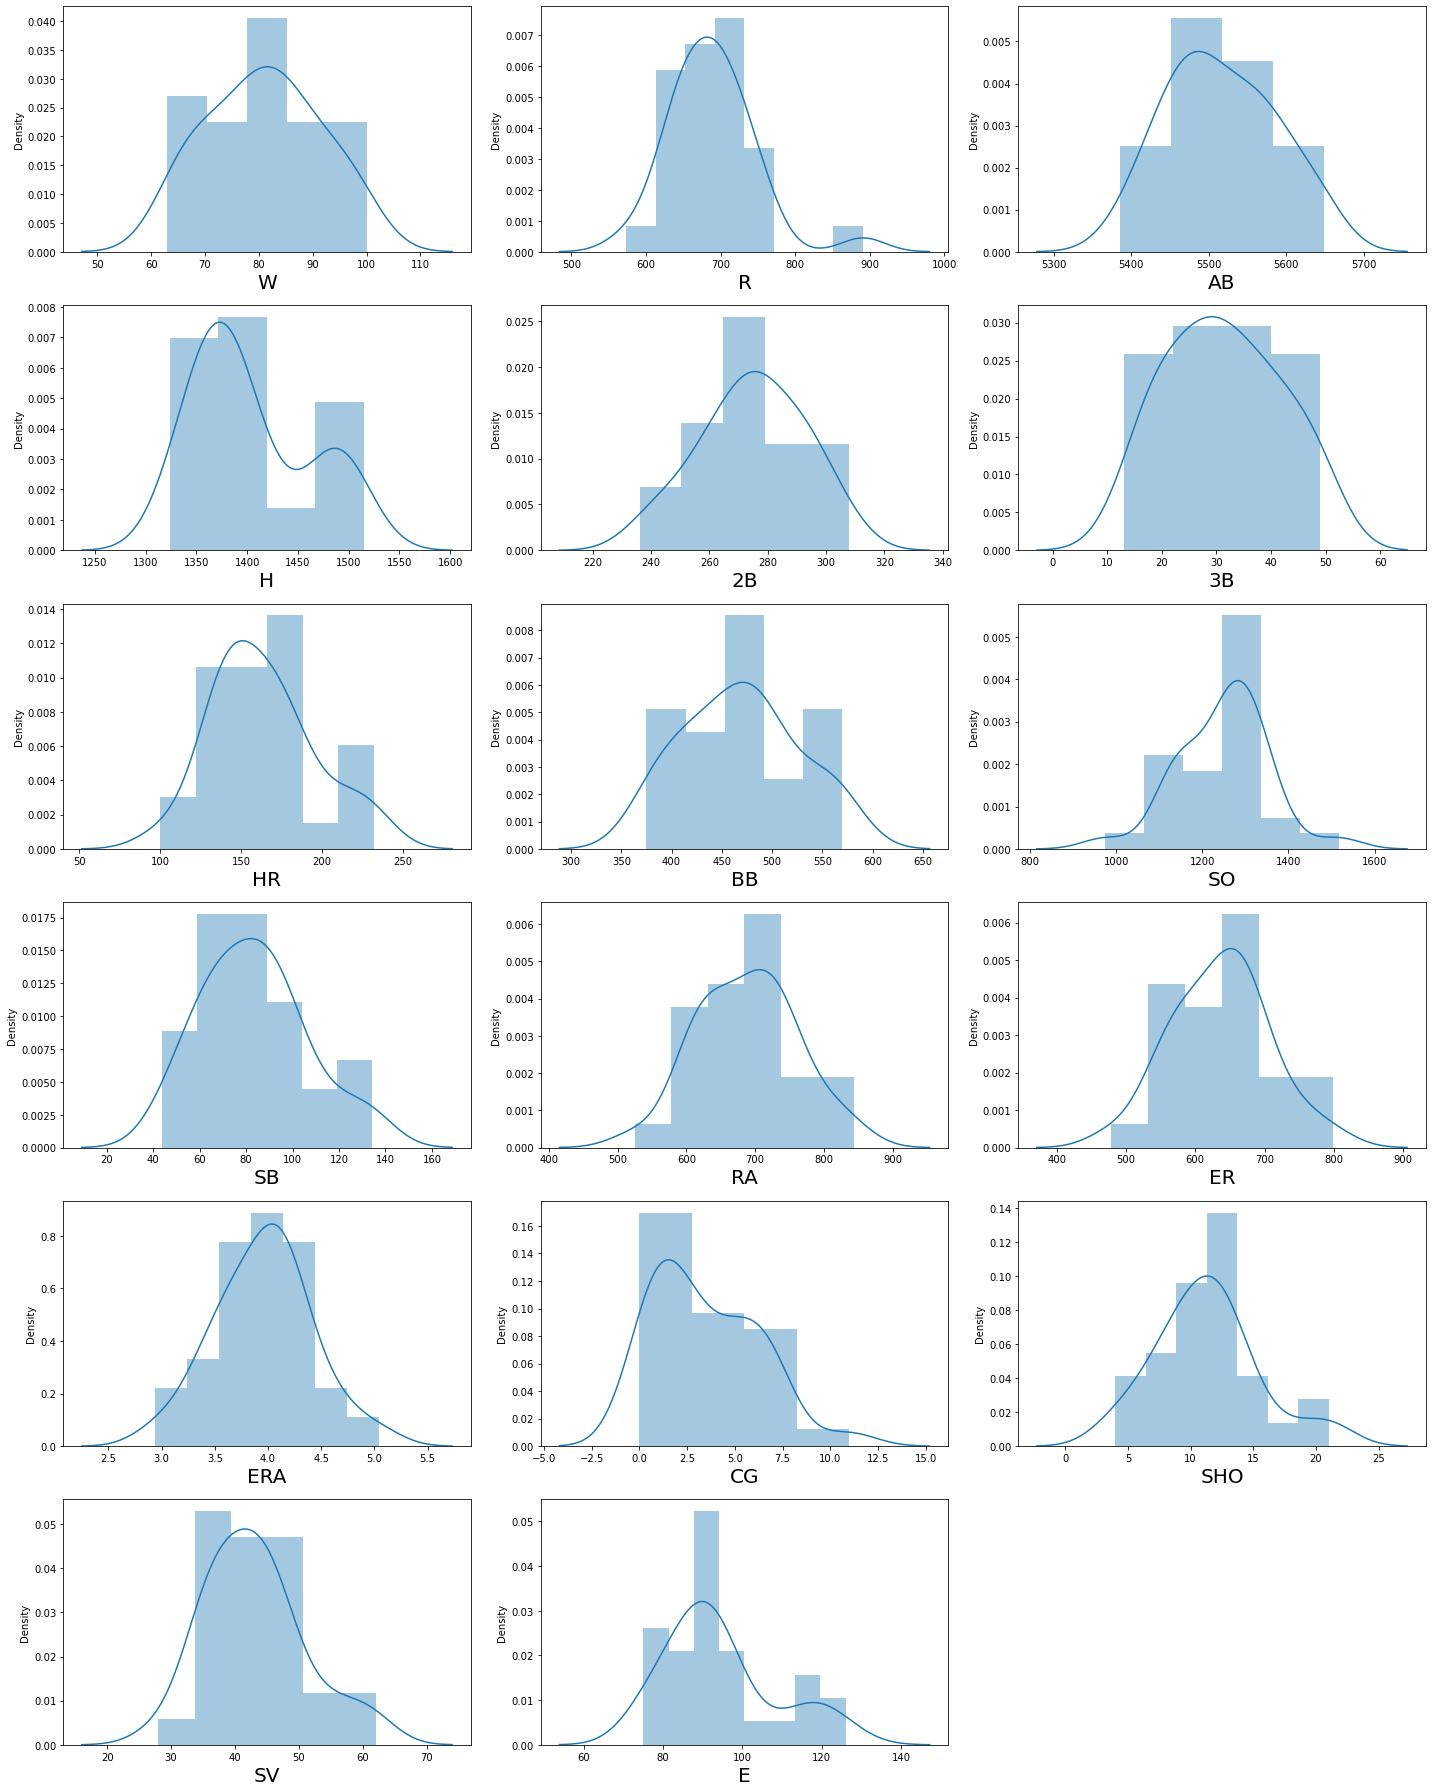

In [21]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Z-score :

In [22]:
from scipy.stats import zscore

z_score = zscore(df[['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,5516.517241,1400.896552,273.586207,31.793103,161.275862,465.620690,1251.551724,83.344828,688.862069,636.758621,3.961724,3.344828,11.344828,43.379310,94.551724
std,10.384006,45.357040,71.701076,56.264265,17.269952,10.276114,29.600792,54.728821,103.930123,23.202949,73.300616,71.195734,0.461148,2.729153,4.185655,7.816712,14.153713
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.000000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,650.000000,5463.000000,1363.000000,262.000000,26.000000,140.000000,426.000000,1159.000000,69.000000,635.000000,584.000000,3.670000,1.000000,9.000000,38.000000,86.000000
50%,81.000000,689.000000,5511.000000,1382.000000,274.000000,32.000000,156.000000,471.000000,1264.000000,83.000000,698.000000,646.000000,4.030000,3.000000,12.000000,43.000000,92.000000
75%,87.000000,713.000000,5571.000000,1420.000000,288.000000,39.000000,177.000000,496.000000,1312.000000,97.000000,733.000000,680.000000,4.240000,5.000000,13.000000,47.000000,97.000000
max,100.000000,764.000000,5649.000000,1515.000000,303.000000,49.000000,230.000000,567.000000,1518.000000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [23]:
#Removing Outliers using z score

from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

[[1.41602548 0.95939835 0.83008422 1.73830631 1.55653766 1.01084549
  0.76586314 1.53635899 2.72762331 0.9059529  0.66451353 0.51114812
  0.51138828 0.50148589 0.81326172 1.64315663 0.47109143]
 [0.23994704 0.33114717 0.70283074 0.93869788 0.20117132 1.20891656
  0.18138864 0.49502051 0.12189552 0.58531515 0.15463823 0.23216082
  0.23895226 0.50148589 0.15929869 0.21100645 0.61489829]
 [0.04393396 0.27466646 1.10025314 0.10665604 1.73332457 0.2766165
  0.69710144 1.25294051 0.9258657  0.11645805 0.67839746 0.75415297
  0.64380131 2.85461197 0.32698152 0.70036184 1.1182223 ]
 [0.44609872 1.32923093 0.23395062 0.35988616 0.8006212  0.47468758
  0.8690057  1.14585706 0.20124579 0.6730368  0.16852216 0.08921679
  0.04033271 1.36301292 0.57012162 0.83055731 0.46365315]
 [0.64211179 0.17408438 1.25589393 2.0638879  0.90831897 1.70409425
  0.35329291 0.19749523 0.07293472 0.01512442 1.58468284 1.56154027
  1.4968761  1.36301292 0.15929869 1.09094826 0.61489829]
 [0.63197318 1.85690002 0.71653

## Correlation 

In [24]:
corr_matrix = df.corr()
corr_matrix["W"].sort_values(ascending=False)

W      1.000000
SV     0.749290
SHO    0.497526
BB     0.447513
R      0.390451
2B     0.384886
HR     0.245697
SO     0.156469
CG     0.029594
H     -0.018360
E     -0.072858
AB    -0.085780
SB    -0.169503
3B    -0.206737
ER    -0.815308
RA    -0.823176
ERA   -0.826952
Name: W, dtype: float64

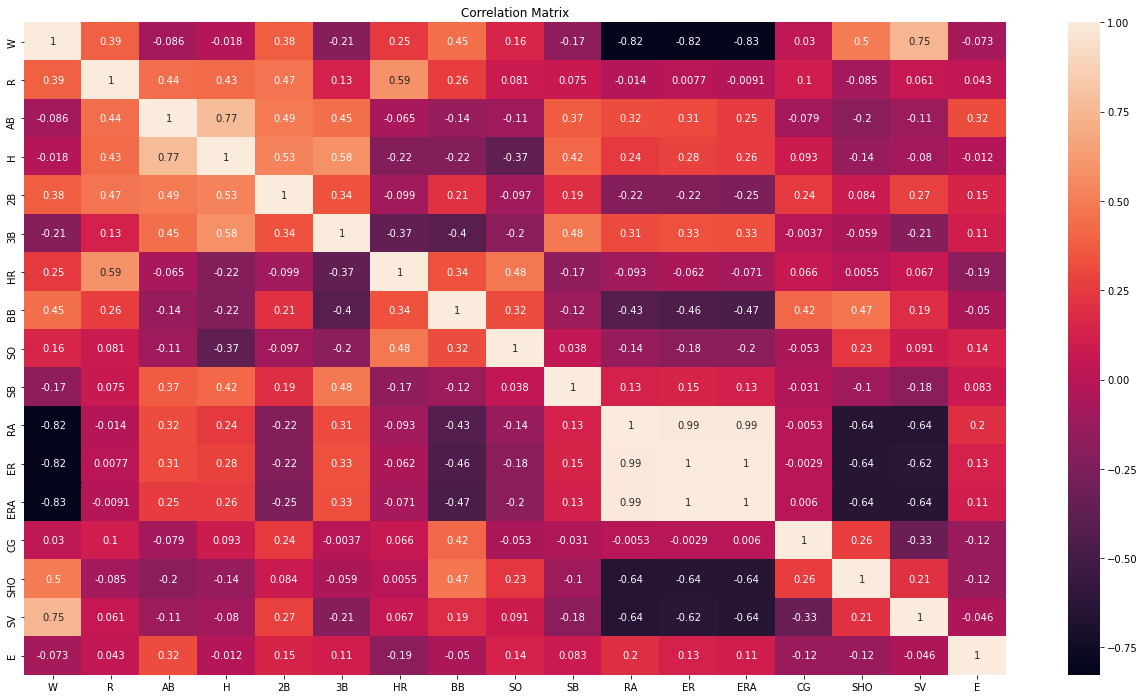

In [25]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

#### Splitting dataset:

In [26]:
x = df.drop(columns = ["W"], axis=1)
y = df["W"]

In [27]:
x.skew()

R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [28]:
features =['R', 'AB', 'H', '2B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO', 'SV', 'E']

In [29]:
# Using StandardScaler:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [55]:
# using PowerTransformer

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,R,AB,H,2B,HR,BB,SO,SB,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165,-0.540820
6,1.964209,0.0,0.0,-0.163010,1.631637,1.579494,-0.269583,-0.884526,0.121871,-2.064039,0.677176,0.082858
7,0.698146,0.0,0.0,-1.542635,1.767734,-0.877217,0.770980,-2.082843,-1.732896,-0.252844,0.052325,-1.588197
8,-0.852595,0.0,0.0,0.199897,0.269125,-0.520476,0.556008,0.267558,-0.870682,0.236737,1.908137,0.237592
9,1.555951,0.0,0.0,1.255256,0.065014,0.270944,-1.019210,-0.466233,0.121871,-0.252844,-0.365006,0.383386
10,1.631727,0.0,0.0,0.262086,0.434620,0.717576,-0.211199,0.824915,0.770649,-0.513555,0.312020,1.554265


#### Find VIF

In [57]:
# To reduce multi-collinearity

x.drop(['ERA', 'RA'], axis=1, inplace=True)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,3.751356,R
1,NaN,AB
2,NaN,H
3,2.476072,2B
4,2.907181,3B
5,4.394574,HR
6,2.683904,BB
7,2.225720,SO
8,1.590429,SB
9,3.692569,ER


In [59]:
#Splitting Data into train and test

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=6)

### Build Model :

In [60]:
#Importing Regression Models:

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [61]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.921424508584359  on Random_state  42


In [62]:
# DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  8.0
Mean Squared Error (MSE):  87.77777777777777
Root Mean Squared Error (RMSE):  9.368979548370131


In [63]:
# RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9175571187555404
Mean Absolute Error (MAE):  6.482222222222223
Mean Squared Error (MSE):  53.84315555555557
Root Mean Squared Error (RMSE):  7.337789555142309


In [64]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.45024162877813034
Mean Absolute Error (MAE):  4.733333333333334
Mean Squared Error (MSE):  29.648888888888912
Root Mean Squared Error (RMSE):  5.445079328062072


In [65]:
# LinearRegression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

y_pred = lin_reg.predict(x_test)

print("Adjusted R2 squared : ",lin_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9437929899760547
Mean Absolute Error (MAE):  5.179273699002337
Mean Squared Error (MSE):  41.38870015989889
Root Mean Squared Error (RMSE):  6.433405020663543


#### Cross validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(lin_reg, x, y, cv=5)
print("Cross Validation score of LinearRegression model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -2.43057709623266
Cross Validation score of RandomForestRegressor model is: -0.5708991838304591
Cross Validation score of KNeighborsRegressor model is: -0.9327268525131052
Cross Validation score of LinearRegression model is: 0.4197577918376439


#### Hyper Parameter Tuning


In [68]:
parameters = {"n_iter":[50,100,130,150,200],
              "compute_score":[True, False],
              "threshold_lambda":[1000,3000,5000,6000,10000],
              "fit_intercept":[True, False],
              "normalize":[True, False],
              "lambda_1":[0.000001, 0.000003, 0.000005, 0.000007, 0.000009],
              "alpha_1":[0.000003, 0.000001, 0.000009, 0.000005, 0.000008]
             }

In [69]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [70]:
grid_para={'copy_X':[True] , 'n_jobs':[1,2] , 'normalize':[False]}
grid_cv = GridSearchCV(LinearRegression(),param_grid=grid_para,cv=5)

#Using 5 fold cross validation
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'n_jobs': [1, 2],
                         'normalize': [False]})

In [71]:
grid_cv.best_params_

{'copy_X': True, 'n_jobs': 1, 'normalize': False}

In [73]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(LinearRegression(), parameters, cv=5)

In [76]:
lr_reg_tuned = LinearRegression(copy_X=True , n_jobs=1 , normalize=False)
lr_reg_tuned.fit(x_train,y_train)
lr_reg_tuned_ypred = lr_reg_tuned.predict(x_test)
r2_score_lr_tuned = r2_score(y_test,lr_reg_tuned_ypred)

print("Adjusted R2 squared : ",lin_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9437929899760547
Mean Absolute Error (MAE):  5.179273699002337
Mean Squared Error (MSE):  41.38870015989889
Root Mean Squared Error (RMSE):  6.433405020663543


## Save Model

In [80]:
from joblib import dump, load

In [84]:
import joblib
final_model=lr_reg_tuned
final_model.fit(x,y)
dump(final_model, 'baseball.lib')

['baseball.lib']

In [85]:
load_m = load('baseball.lib')

In [86]:
model = joblib.load("baseball.lib")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,68.613636
1,60.547423
2,95.051638
3,76.740202
4,86.966014
5,90.087927
6,86.640028
7,94.417963
8,80.275991
